
# EEG Augmentation Visualization – Side-by-Side + Zoomed

This notebook compares original vs augmented EEG patients using:
- Side-by-side time series plots (original and augmented)
- A zoomed view of the first 20 timepoints

Includes:
- Noise-Augmented ADHD and Non-ADHD examples
- Mix-Augmented ADHD and Non-ADHD examples


In [33]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load datasets
df_original = pd.read_csv('../../data/adhdata.csv')
df_noise = pd.read_csv('../../data/augmented/augmented_noise_data.csv')
df_mixed = pd.read_csv('../../data/augmented/augmented_mixed_data.csv')

eeg_cols = df_original.select_dtypes(include=np.number).columns.tolist()
patient_col = 'ID'
label_col = 'Class'


In [34]:

def plot_noise_augmented_side_by_side(original_df, augmented_df, patient_id_augmented, title1, title2):
    # 1. Pick a random patient from augmented data
    aug_ids = augmented_df[patient_col].unique()
    if len(aug_ids) == 0:
        print("⚠️ No augmented patients found.")
        return
    
    patient_id_augmented = np.random.choice(aug_ids)
    patient_id_original = patient_id_augmented[:-1]  # strip 'a'

    # 2. Get data
    original = original_df[original_df[patient_col] == patient_id_original].reset_index(drop=True)
    augmented = augmented_df[augmented_df[patient_col] == patient_id_augmented].reset_index(drop=True)

    if original.empty or augmented.empty:
        print(f"⚠️ Data missing for: {patient_id_original} or {patient_id_augmented}")
        return

    # 3. Plot full time series
    fig, axs = plt.subplots(1, 2, figsize=(18, 5), sharey=True)
    axs[0].plot(original[eeg_cols].values)
    axs[0].set_title(f"{title1}: {patient_id_original}")
    axs[0].legend(eeg_cols, loc='upper right')
    axs[0].set_ylabel("EEG Signal")

    axs[1].plot(augmented[eeg_cols].values)
    axs[1].set_title(f"{title2}: {patient_id_augmented}")
    axs[1].legend(eeg_cols, loc='upper right')
    axs[1].set_xlabel("Time (row index)")
    plt.suptitle("Full Time Series")
    plt.tight_layout()
    plt.show()

    # 4. Plot zoomed view (first 20 timepoints)
    zoom_len = min(20, len(original), len(augmented))
    fig, axs = plt.subplots(1, 2, figsize=(18, 5), sharey=True)
    axs[0].plot(original[eeg_cols].iloc[:zoom_len].values)
    axs[0].set_title(f"{title1} (first 20 rows)")

    axs[1].plot(augmented[eeg_cols].iloc[:zoom_len].values)
    axs[1].set_title(f"{title2} (first 20 rows)")

    axs[0].legend(eeg_cols, loc='upper right')
    axs[1].legend(eeg_cols, loc='upper right')
    plt.suptitle("Zoomed: First 20 Timepoints")
    plt.tight_layout()
    plt.show()



In [35]:

def plot_mix_augmented_side_by_side(mixed_df, label_filter, title_prefix):
    # 1. Sample a mixed patient first
    sub_df = mixed_df[mixed_df[label_col] == label_filter]
    if sub_df.empty:
        print(f"No mix-augmented patients found for label: {label_filter}")
        return

    sample = sub_df.sample(1)
    mix_id = sample[patient_col].values[0]

    try:
        p1, p2, _ = mix_id.split("_")
    except:
        print(f"Could not parse donor IDs from: {mix_id}")
        return

    # 2. Get full sequences for donors and mixed patient
    df1 = df_original[df_original[patient_col] == p1].reset_index(drop=True)
    df2 = df_original[df_original[patient_col] == p2].reset_index(drop=True)
    df_mix = sub_df[sub_df[patient_col] == mix_id].reset_index(drop=True)

    min_len = min(len(df1), len(df2), len(df_mix))
    zoom_len = min(20, min_len)

    # 3. Plot full time series
    fig, axs = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
    axs[0].plot(df1[eeg_cols].values)
    axs[0].set_title(f"{title_prefix} – Donor 1: {p1}")
    axs[0].legend(eeg_cols, loc='upper right')

    axs[1].plot(df_mix[eeg_cols].values)
    axs[1].set_title(f"{title_prefix} – Mixed: {mix_id}")
    axs[1].legend(eeg_cols, loc='upper right')

    axs[2].plot(df2[eeg_cols].values)
    axs[2].set_title(f"{title_prefix} – Donor 2: {p2}")
    axs[2].legend(eeg_cols, loc='upper right')

    plt.suptitle("Full Time Series")
    plt.tight_layout()
    plt.show()

    # 4. Zoomed-in (first 20 timepoints)
    fig, axs = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
    axs[0].plot(df1[eeg_cols].iloc[:zoom_len].values)
    axs[0].set_title(f"Donor 1: {p1} (first 20 rows)")

    axs[1].plot(df_mix[eeg_cols].iloc[:zoom_len].values)
    axs[1].set_title(f"Mixed: {mix_id} (first 20 rows)")

    axs[2].plot(df2[eeg_cols].iloc[:zoom_len].values)
    axs[2].set_title(f"Donor 2: {p2} (first 20 rows)")

    for ax in axs:
        ax.legend(eeg_cols, loc='upper right')

    plt.suptitle("Zoomed: First 20 Timepoints")
    plt.tight_layout()
    plt.show()



## Plot 1: ADHD - Noise-Augmented vs Original

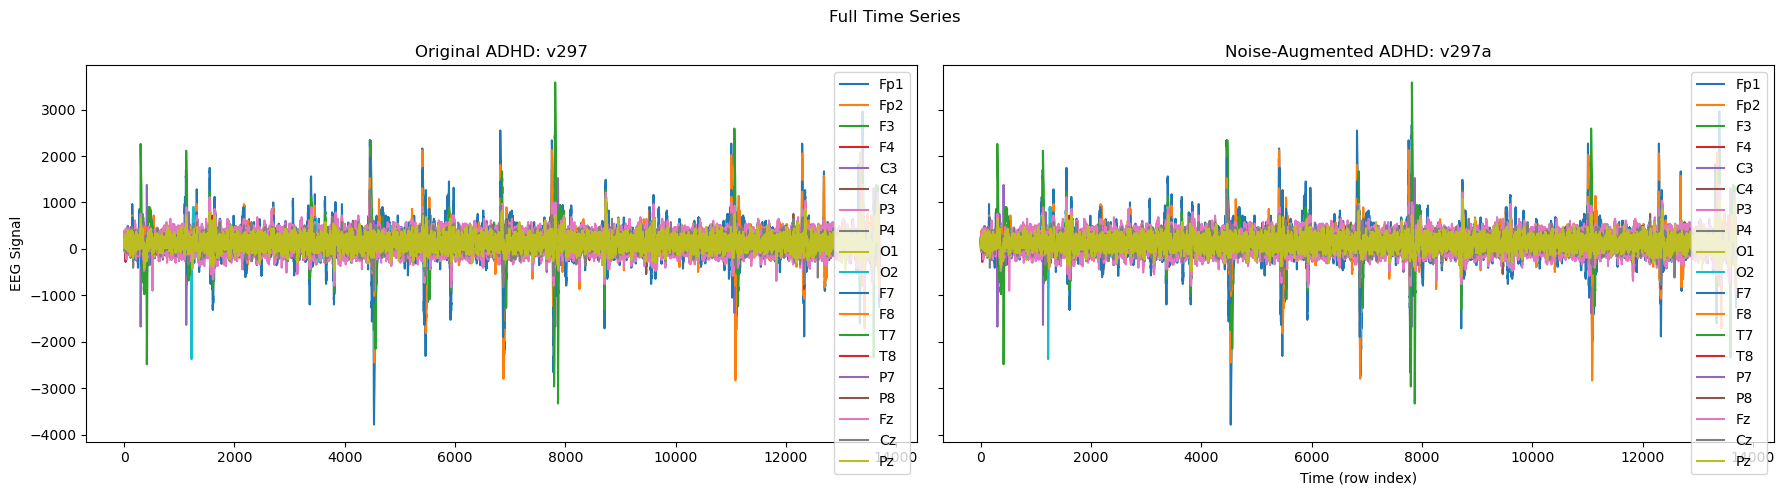

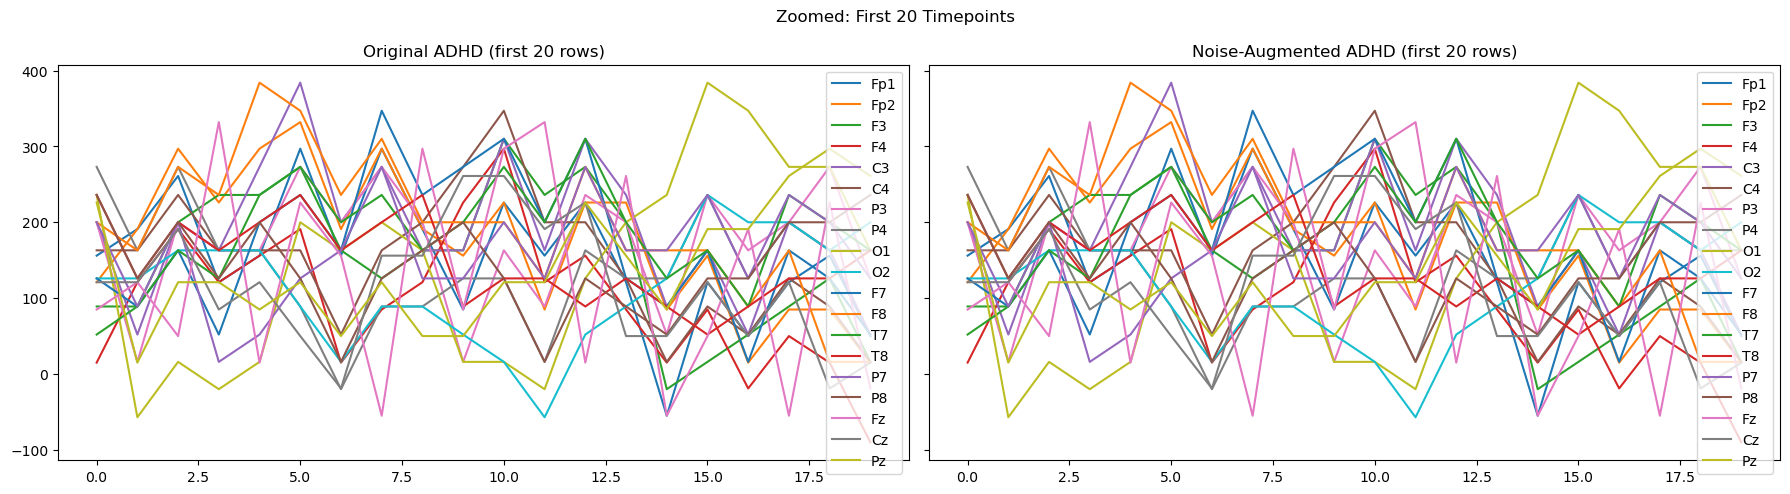

In [36]:

adhd_ids = df_original[df_original[label_col] == 'ADHD'][patient_col].unique()
example_id = np.random.choice(adhd_ids)
plot_noise_augmented_side_by_side(df_original, df_noise, example_id, "Original ADHD", "Noise-Augmented ADHD")


## Plot 2: Non-ADHD - Noise-Augmented vs Original

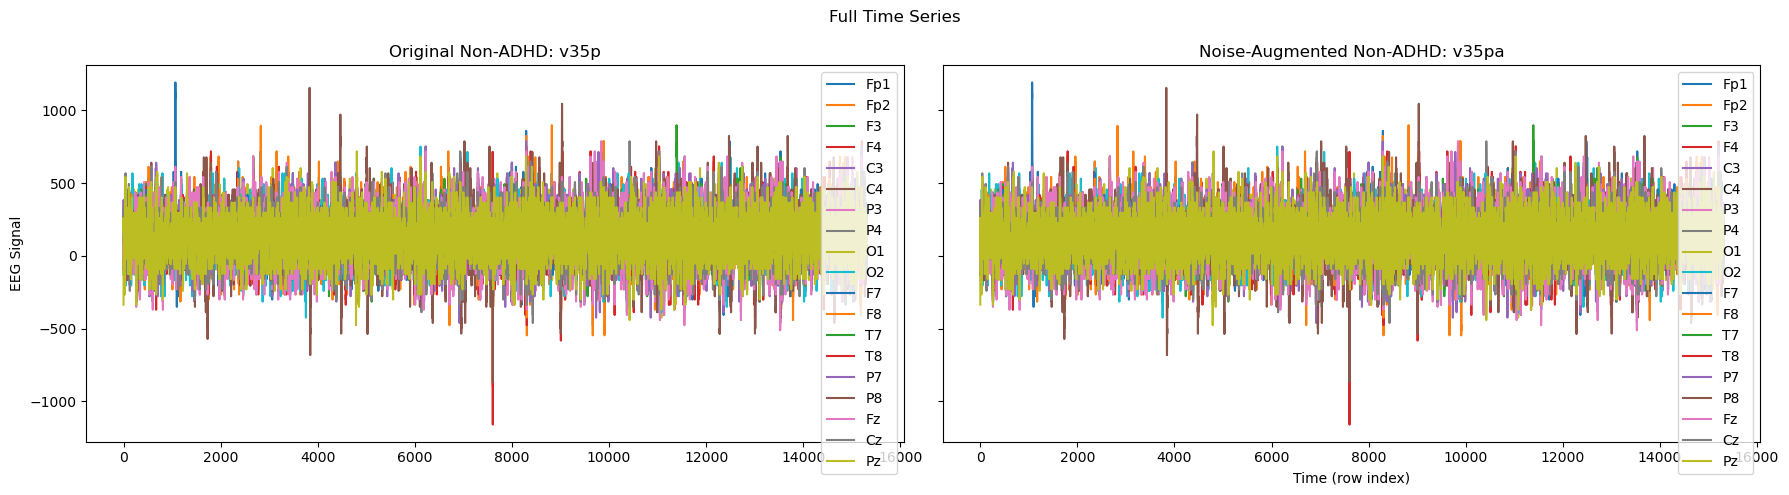

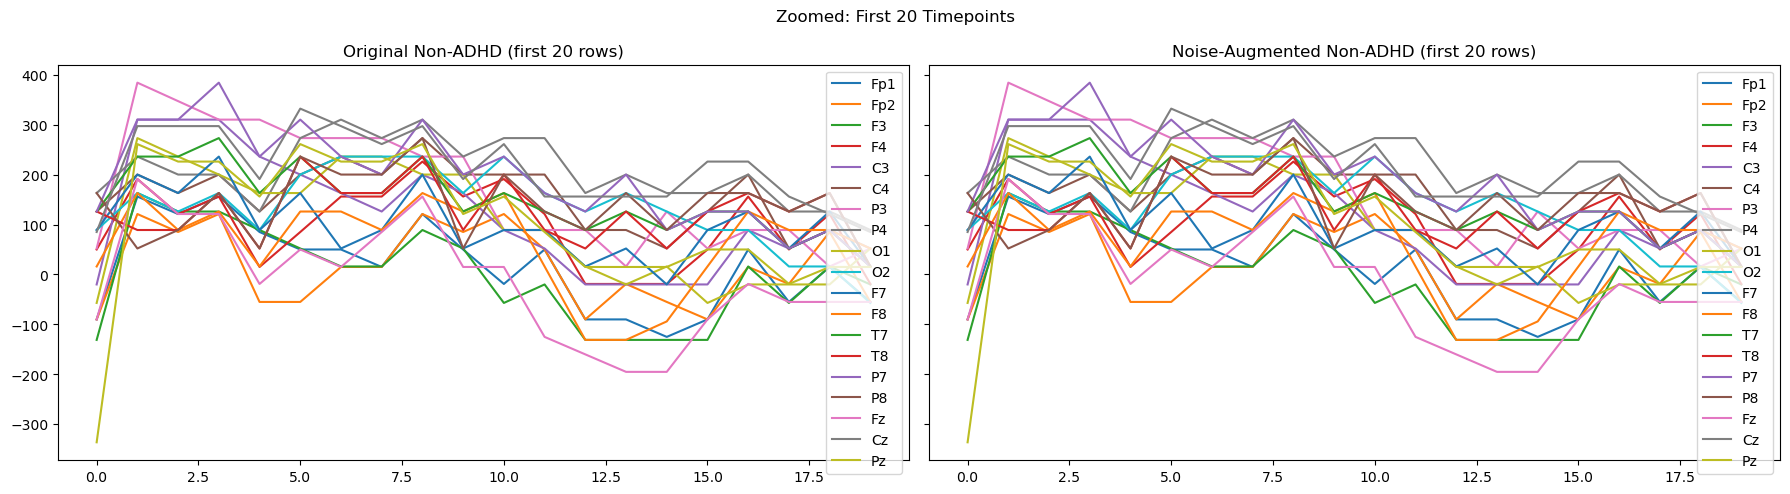

In [37]:

nonadhd_ids = df_original[df_original[label_col] != 'ADHD'][patient_col].unique()
example_id = np.random.choice(nonadhd_ids)
plot_noise_augmented_side_by_side(df_original, df_noise, example_id, "Original Non-ADHD", "Noise-Augmented Non-ADHD")


## Plot 3: ADHD - Mix-Augmented vs Donors

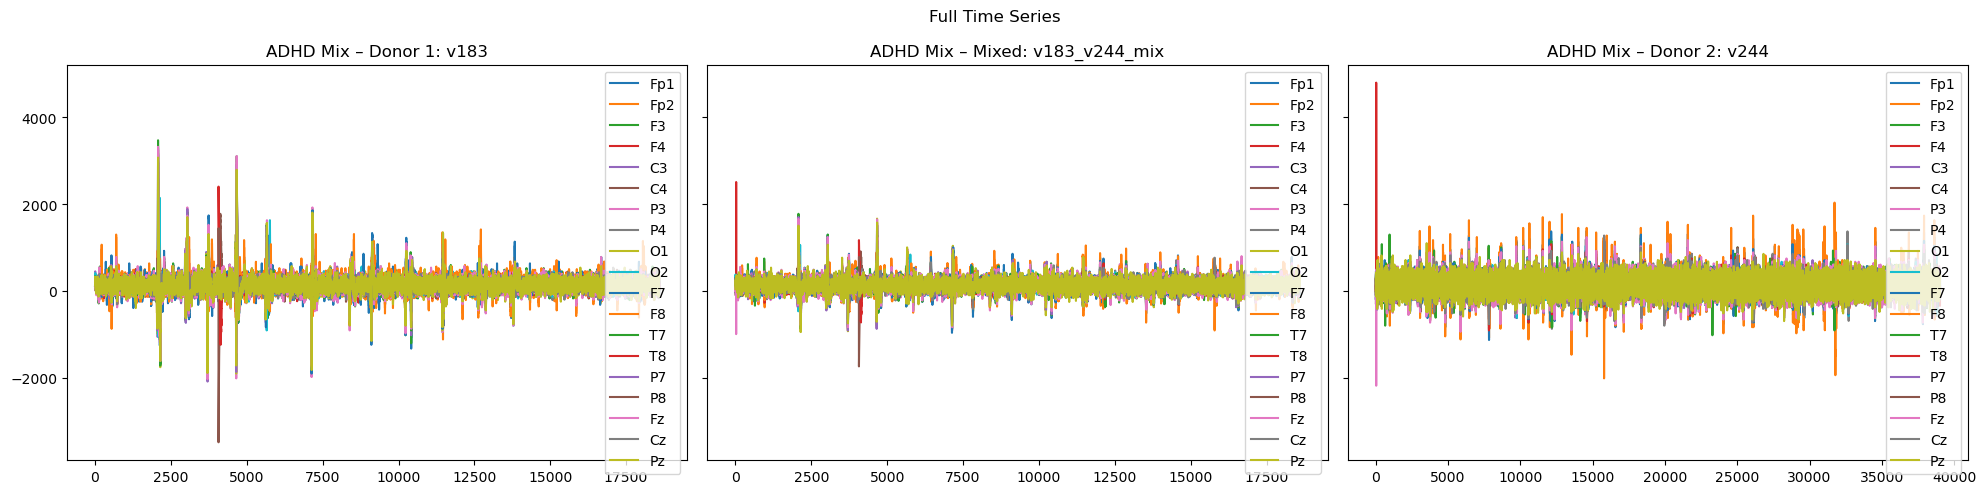

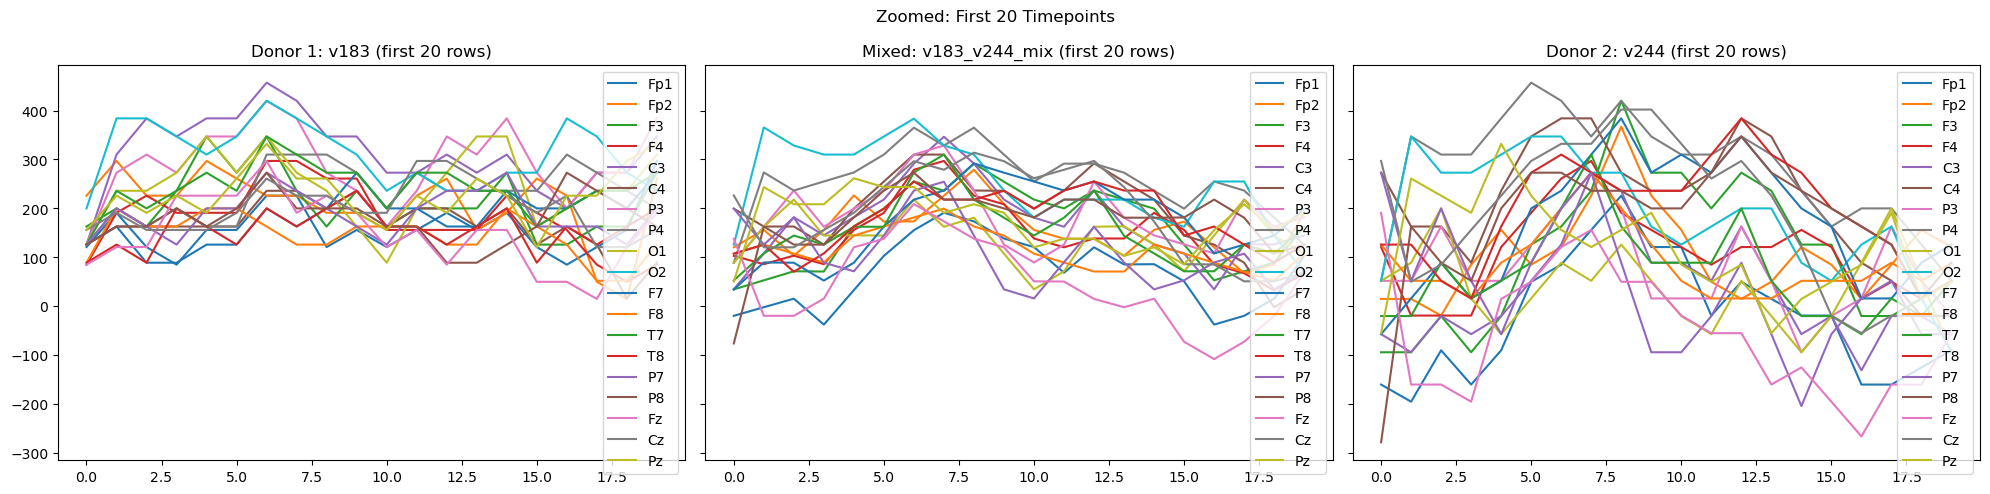

In [38]:
plot_mix_augmented_side_by_side(df_mixed, 'ADHD', 'ADHD Mix')

## Plot 4: Non-ADHD - Mix-Augmented vs Donors

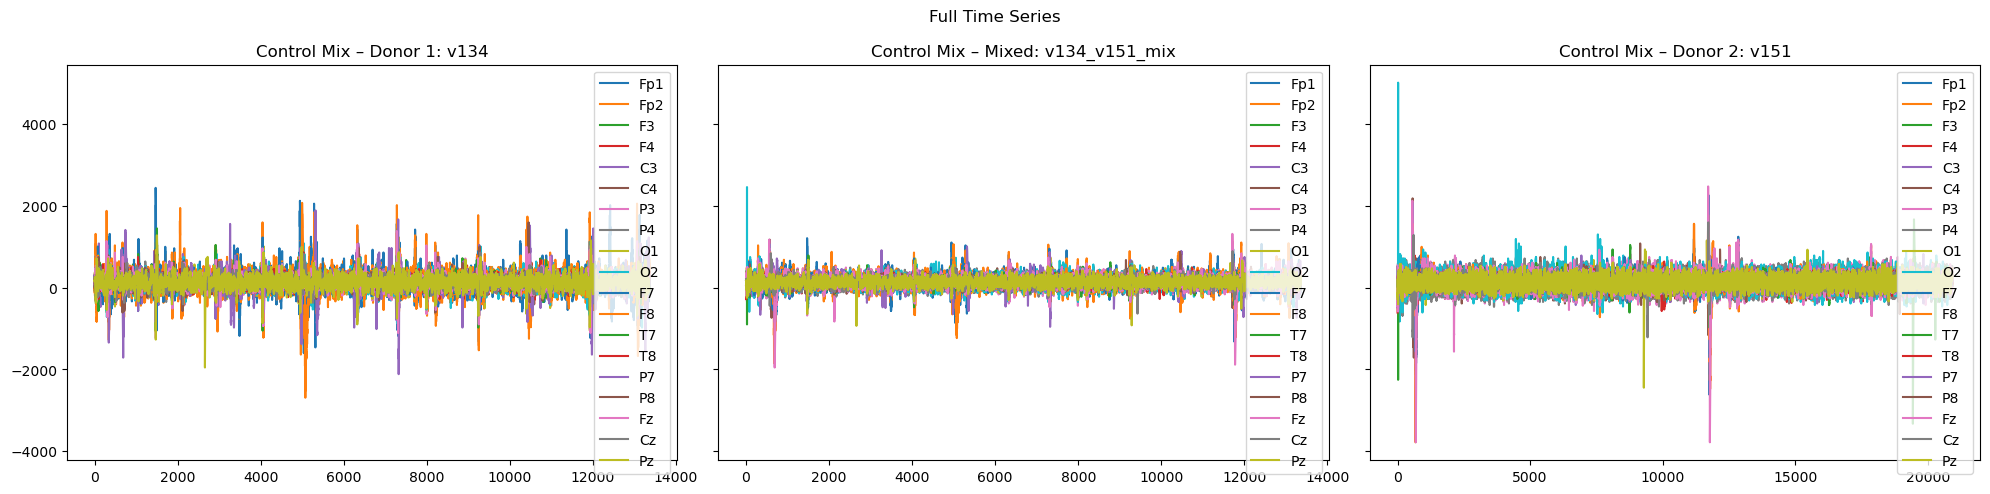

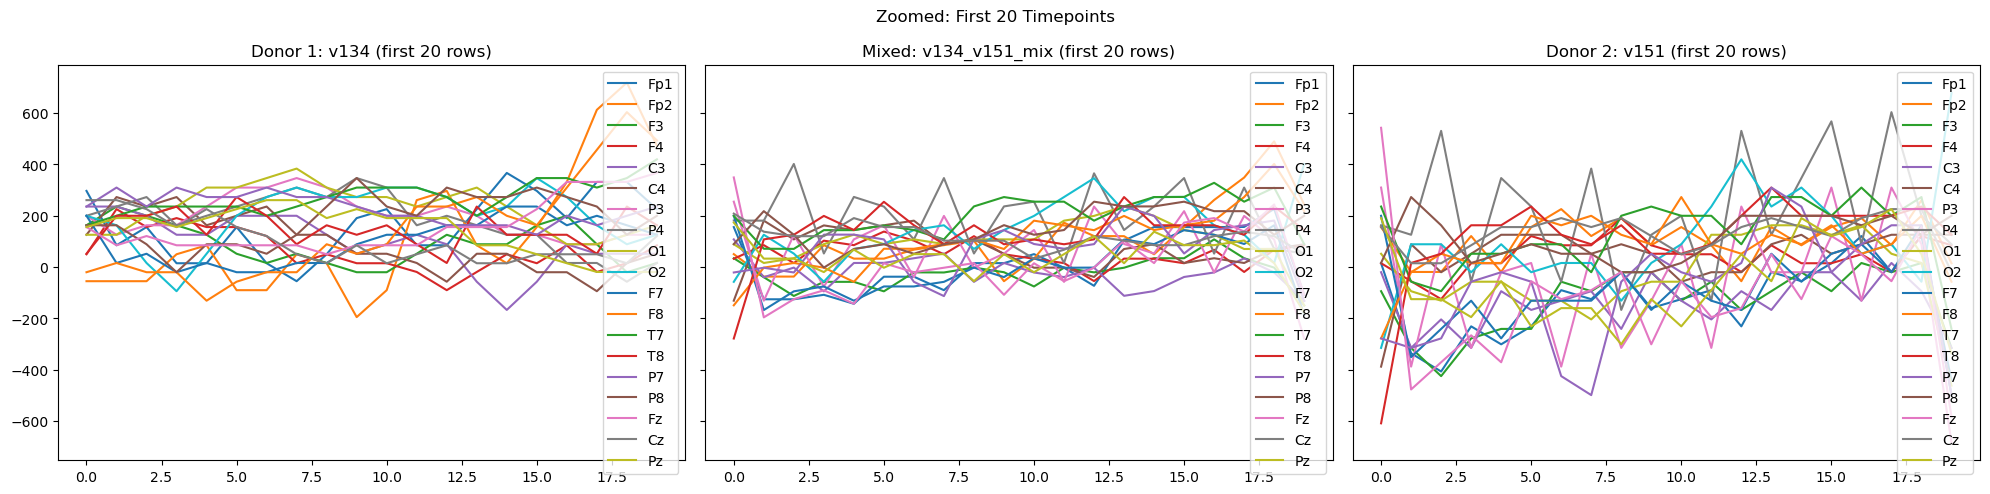

In [39]:
plot_mix_augmented_side_by_side(df_mixed, 'Control', 'Control Mix')